Car Price Predictor with Machine Learning and Tkinter

This project is a machine learning-based application that predicts car prices based on various features such as model, year, mileage, and fuel type. Using a trained model, the program estimates the price of a car based on user inputs through an interactive Tkinter interface

In [1]:
import pandas as pd
car_data=pd.read_csv("car_price_prediction.csv")
car_data.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


We check for null values

In [2]:
print(car_data.shape)
car_data.isnull().sum()

(19237, 18)


ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

To see the price distribution

<Axes: ylabel='Price'>

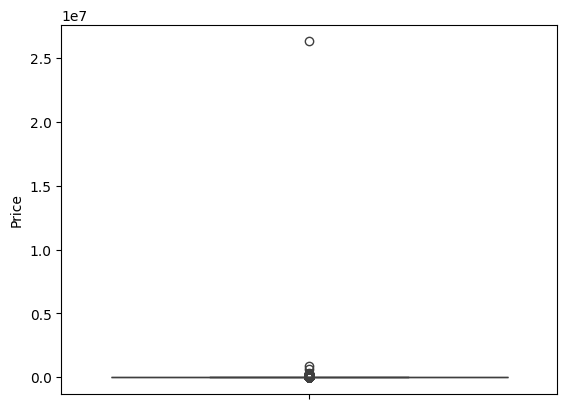

In [3]:
import seaborn as sns
sns.boxplot(car_data["Price"])

In [4]:
car_data_orderprice = car_data.sort_values(by="Price", ascending=False)
car_data_orderprice.head(1)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
16983,45812886,26307500,-,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0


We have found a car with an unusual price, so in order not to influence the calculation, we will make the prediction without taking it in consideration.

<Axes: ylabel='Price'>

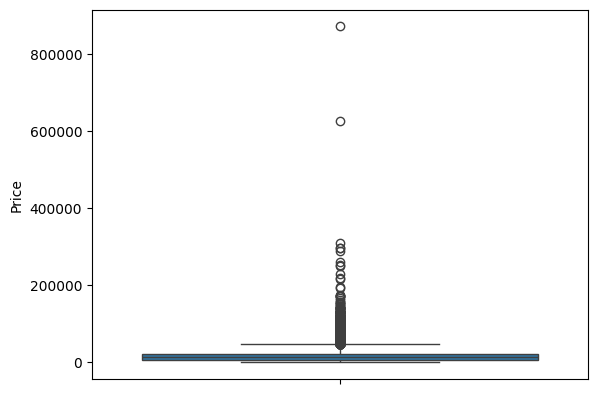

In [5]:
car_data = car_data[car_data['Price'] < 10000000] 
sns.boxplot(car_data["Price"])

Let's give numerical values to the features

In [6]:
car_data["Mileage"].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [7]:
car_data["Mileage"] = car_data["Mileage"].str.replace(" km", "").str.replace(",", "").str.replace(".", "").astype(int)

In [8]:

drive_wheels_mapping = {drive_wheel: index for index, drive_wheel in enumerate(car_data["Drive wheels"].unique())}
car_data["Drive wheels"] = car_data["Drive wheels"].map(drive_wheels_mapping)

color_mapping = {color: index for index, color in enumerate(car_data["Color"].unique())}
car_data["Color"] = car_data["Color"].map(color_mapping)


In [9]:
car_data["Manufacturer"].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [10]:
manufacturer_mapping={manufacturer: index for index, manufacturer in enumerate(car_data["Manufacturer"].unique())}
car_data["Manufacturer"]= car_data["Manufacturer"].map(manufacturer_mapping)

In [11]:
car_data["Gear box type"].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [12]:
car_data["Gear box type"]= car_data["Gear box type"].map({'Automatic': 0, 'Tiptronic': 1, 'Variator': 2, 'Manual': 3})

In [13]:
model_mapping = {model: index for index, model in enumerate(car_data["Model"].unique())}
car_data["Model"] = car_data["Model"].map(model_mapping)

In [14]:
car_data["Category"].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

In [15]:
category_mapping = {category: index for index, category in enumerate(car_data["Category"].unique())}
car_data["Category"] = car_data["Category"].map(category_mapping)

In [16]:
car_data["Fuel type"].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [17]:
car_data["Fuel type"]= car_data["Fuel type"].map({"Hybrid": 0, "Petrol": 1, 
'Diesel': 2, 'CNG': 3, 'Plug-in Hybrid':4, 'LPG':5,'Hydrogen':6})

In [18]:
car_data["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [19]:
car_data["Has Turbo"] = car_data["Engine volume"].str.contains("Turbo").astype(int)

car_data["Engine volume"] = car_data["Engine volume"].str.replace(r'Turbo', '', regex=True).astype(float)


In [20]:
car_data["Leather interior"].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
car_data["Leather interior"]=car_data["Leather interior"].map({"Yes": 0, "No": 1})

We define the variables x and y in which x is all the features and y is the label

In [22]:
X = car_data[["Prod. year","Leather interior","Drive wheels","Manufacturer","Model", "Gear box type","Category", "Fuel type", "Airbags","Engine volume", "Mileage", "Cylinders", "Has Turbo"]]
y = car_data['Price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [25]:
# Check if there is NaN in X_train
print(X_train.isnull().sum())

# Check if there is NaN in y_train
print(y_train.isnull().sum())


Prod. year          0
Leather interior    0
Drive wheels        0
Manufacturer        0
Model               0
Gear box type       0
Category            0
Fuel type           0
Airbags             0
Engine volume       0
Mileage             0
Cylinders           0
Has Turbo           0
dtype: int64
0


In [26]:
# Create the models
lr = LinearRegression()
rf = RandomForestRegressor()
xgb = GradientBoostingRegressor()
xg = XGBRegressor()

# Train the models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
xg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Prediction

In [27]:
y_pred1=lr.predict(X_test)
y_pred2=rf.predict(X_test)
y_pred3=xgb.predict(X_test)
y_pred4=xg.predict(X_test)

We evaluate the algorithm

In [28]:
from sklearn import metrics


score1=metrics.r2_score(y_test, y_pred1)
score2=metrics.r2_score(y_test, y_pred2)
score3=metrics.r2_score(y_test, y_pred3)
score4=metrics.r2_score(y_test, y_pred4)
print(score1, score2, score3, score4)

0.18312430235901966 0.6850870346112322 0.5376575080440896 0.6249918937683105


Show the results

In [29]:
import pandas as pd

score = pd.DataFrame({'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
                      'R2 Score': [score1, score2, score3, score4]})

score.head(10)


,Model,R2 Score
0,Model 1,0.183124
1,Model 2,0.685087
2,Model 3,0.537658
3,Model 4,0.624992


In [30]:
rf=RandomForestRegressor()
rf_final=rf.fit(X,y)

In [31]:
import joblib

joblib.dump(rf_final, 'model_train.pkl')


['model_train.pkl']

TKINTER 

In [ ]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import joblib
import pandas as pd

rf_final = joblib.load('model_train.pkl')

file = "../CarPrices/car_price_prediction.csv"
car_initial = pd.read_csv(file)  
car_data = car_initial.copy()  

manufacturer_options = sorted(car_initial['Manufacturer'].unique())
model_options = sorted(car_initial['Model'].unique())
category_options = sorted(car_initial['Category'].unique())
fuel_type_options = sorted(car_initial['Fuel type'].unique())
gear_box_options = sorted(car_initial['Gear box type'].unique())
drive_wheels_options = sorted(car_initial['Drive wheels'].unique())  
color_options = sorted(car_initial['Color'].unique())
leather_options = ['Yes', 'No']

def convert_to_numero(value, column):
    unique_values = car_initial[column].unique()  
    mapping = {text: index for index, text in enumerate(unique_values)}
    return mapping[value]

def predict_pirce():
        Manufacturer = convert_to_numero(entry_manufacturer.get(), 'Manufacturer')
        Model = convert_to_numero(entry_model.get(), 'Model')
        Prod_year = int(entry_prod_year.get())
        Category = convert_to_numero(entry_category.get(), 'Category')
        Leather_interior = 0 if entry_leather_interior.get() == 'Yes' else 1
        Fuel_type = convert_to_numero(entry_fuel_type.get(), 'Fuel type')
        Engine_volume = float(entry_engine_volume.get())
        Mileage = float(entry_mileage.get())
        Cylinders = int(entry_cylinders.get())
        Gear_box_type = convert_to_numero(entry_gear_box_type.get(), 'Gear box type')
        Drive_wheels = convert_to_numero(entry_drive_wheels.get(), 'Drive wheels')  
        Color = convert_to_numero(entry_color.get(), 'Color')
        Airbags = int(entry_airbags.get())

        if -1 in [Manufacturer, Model, Category, Fuel_type, Gear_box_type, Drive_wheels, Color]:
            return

        input_data = np.array([[
            Prod_year, Leather_interior, Drive_wheels, Manufacturer, Model, Gear_box_type, 
            Category, Fuel_type, Airbags, Engine_volume, Mileage, Cylinders, 0
        ]])

        predicted_price = rf_final.predict(input_data)
        label_result.config(text=f"Price Predict: ${predicted_price[0]:.2f}")

# Create the window
window = tk.Tk()
window.title("Car Price Prediction")
window.geometry("400x600")

# Create comboxes and inputs
text_manufacturer = tk.Label(window, text="Manufacturer")
text_manufacturer.grid(row=0, column=0)
entry_manufacturer = ttk.Combobox(window, values=manufacturer_options)
entry_manufacturer.grid(row=0, column=1)

text_model = tk.Label(window, text="Model")
text_model.grid(row=1, column=0)
entry_model = ttk.Combobox(window, values=model_options)
entry_model.grid(row=1, column=1)

text_prod_year = tk.Label(window, text="Production Year")
text_prod_year.grid(row=2, column=0)
entry_prod_year = tk.Entry(window)
entry_prod_year.grid(row=2, column=1)

text_category = tk.Label(window, text="Category")
text_category.grid(row=3, column=0)
entry_category = ttk.Combobox(window, values=category_options)
entry_category.grid(row=3, column=1)

text_leather_interior = tk.Label(window, text="Leather Interior")
text_leather_interior.grid(row=4, column=0)
entry_leather_interior = ttk.Combobox(window, values=leather_options)
entry_leather_interior.grid(row=4, column=1)

text_fuel_type = tk.Label(window, text="Fuel Type")
text_fuel_type.grid(row=5, column=0)
entry_fuel_type = ttk.Combobox(window, values=fuel_type_options)
entry_fuel_type.grid(row=5, column=1)

text_engine_volume = tk.Label(window, text="Engine Volume")
text_engine_volume.grid(row=6, column=0)
entry_engine_volume = tk.Entry(window)
entry_engine_volume.grid(row=6, column=1)

text_mileage = tk.Label(window, text="Mileage")
text_mileage.grid(row=7, column=0)
entry_mileage = tk.Entry(window)
entry_mileage.grid(row=7, column=1)

text_cylinders = tk.Label(window, text="Cylinders")
text_cylinders.grid(row=8, column=0)
entry_cylinders = tk.Entry(window)
entry_cylinders.grid(row=8, column=1)

text_gear_box_type = tk.Label(window, text="Gear Box Type")
text_gear_box_type.grid(row=9, column=0)
entry_gear_box_type = ttk.Combobox(window, values=gear_box_options)
entry_gear_box_type.grid(row=9, column=1)

text_drive_wheels = tk.Label(window, text="Drive Wheels")
text_drive_wheels.grid(row=10, column=0)
entry_drive_wheels = ttk.Combobox(window, values=drive_wheels_options)
entry_drive_wheels.grid(row=10, column=1)

text_color = tk.Label(window, text="Color")
text_color.grid(row=11, column=0)
entry_color = ttk.Combobox(window, values=color_options)
entry_color.grid(row=11, column=1)

text_airbags = tk.Label(window, text="Airbags")
text_airbags.grid(row=12, column=0)
entry_airbags = tk.Entry(window)
entry_airbags.grid(row=12, column=1)

# Button prediction
btn_predict = tk.Button(window, text="Predice Price", command=predict_pirce)
btn_predict.grid(row=13, column=0, columnspan=2)

label_result = tk.Label(window, text="Price Predicted: $0.00", font=("Arial", 12))
label_result.grid(row=14, column=0, columnspan=2)

window.mainloop()
